In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

True

**Table of contents**<a id='toc0_'></a>    
- [Тесты, ничего интересного](#toc1_1_)    
- [Запрос на общую тему](#toc2_)    
  - [Без корректировки нужный результат на втором месте](#toc2_1_)    
  - [С корректировкой](#toc2_2_)    
- [Фейл с "презентация про маркетплейсы"](#toc3_)    
- [Фейл с мемом "И так сойдет"](#toc4_)    
- [Презентация про рексис. ОК](#toc5_)    
- [Презентация про CV.](#toc6_)    
  - [Без HyperbolicScorer нашел не то](#toc6_1_)    
  - [С HyperbolicScorer нашел что надо](#toc6_2_)    
- [Презентация про окатыши. Ок](#toc7_)    
- [Презентация с таблицей. Нашел, но не тот слайд.](#toc8_)    
- [Код для скоринга](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
from src import (
    PresentationAnalysis,
    SlideAnalysis,
    Config,
    display_chain_outputs
)
from src.chains.chains import FindPdfChain
from src.config.output_formatting import display_presentation_analysis, display_presentation_from_file
from src.testing_utils import EchoLLM
import logging
from src.config.output_formatting import display_search_result_page


from src.rag import ChromaSlideStore
from src.webapp.app import format_presentation_results

from src.rag.score import HyperbolicScorer, MinScorer, WeightedScorer

config = Config()

In [3]:
collection_name = "pres0"
storage = ChromaSlideStore("pres0")

## <a id='toc1_1_'></a>[Тесты, ничего интересного](#toc0_)

0.34689521834366305
0.4154782931009929
0.42212743759155275
0.5243420004844666
0.5315415859222412
0.5524426698684692
Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 10
--------------------------------------------------------------------------------


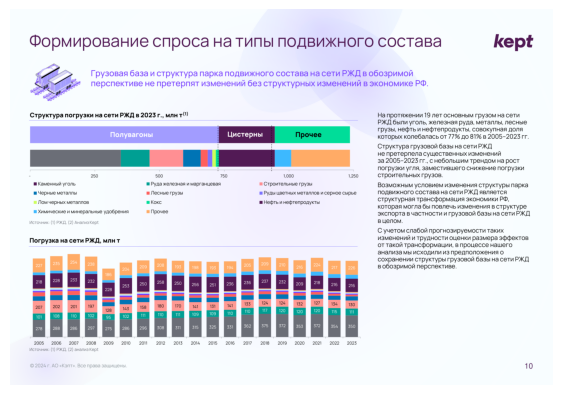

## Kept_Подвижной состав РФ_2024 (20 стр)

|   page_nums |   page_scores |
|------------:|--------------:|
|          10 |        0.4593 |
|          12 |        0.4765 |
|           3 |        0.4859 |
|           9 |        0.4991 |
|           4 |        0.5242 |
|           6 |        0.5292 |
|          13 |        0.5307 |
|          11 |        0.5397 |
|           2 |        0.541  |
|          16 |        0.5412 |
|          14 |        0.555  |
|          15 |        0.557  |
|          17 |        0.5584 |

**Rank Score:** 0.3469
### Page: 10
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4593      |
| visual_content           | 0.5082      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4593
> Тема: Формирование спроса на под

In [ ]:
result = storage.search_query_presentations(
    "Презентация про жд перевозки",
    n_results=30
)
print(*result.get_scores(), sep="\n")
display_search_result_page(result[0][0], display_text=False)
print(format_presentation_results(result[0], n_pages=1))

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 10
--------------------------------------------------------------------------------


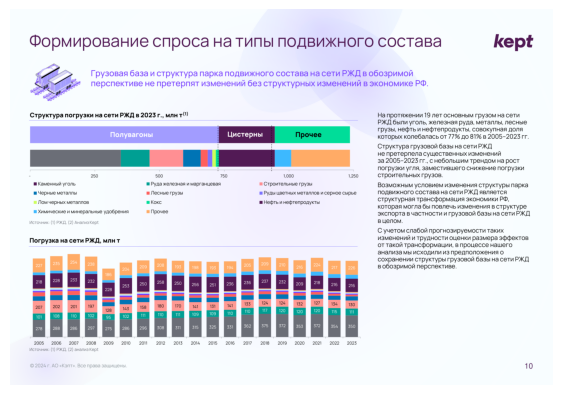

## Kept_Подвижной состав РФ_2024 (20 стр)

|   page_nums |   page_scores |
|------------:|--------------:|
|          10 |        0.4593 |
|          12 |        0.4765 |
|           3 |        0.4859 |
|           9 |        0.4991 |
|           4 |        0.5242 |
|           6 |        0.5292 |
|          13 |        0.5307 |
|          11 |        0.5397 |
|           2 |        0.541  |
|          16 |        0.5412 |
|          14 |        0.555  |
|          15 |        0.557  |
|          17 |        0.5584 |

**Mean Score:** 0.5229
### Page: 10
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.4593

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4593      |
| visual_content           | 0.5082      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4593
> Тема: Формирование спроса

In [ ]:
r = results[1]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 10
--------------------------------------------------------------------------------


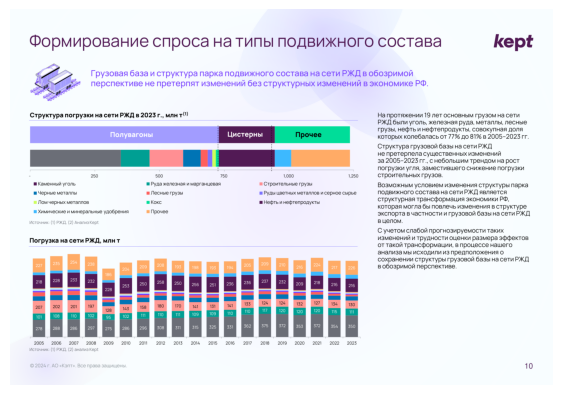


Best matching chunk (topic_overview):
Distance: 0.459
--------------------------------------------------------------------------------
Тема: Формирование спроса на подвижной состав РЖД
Цель: Показать структуру грузовой базы и прогнозы на будущее
Ключевая информация: Основные типы грузов и их доля в общем объеме погрузки.

Chunk distances:
--------------------------------------------------------------------------------
text_content: not matched
visual_content: 0.508
topic_overview: 0.459
conclusions_and_insights: not matched
layout_and_composition: not matched

Full slide content:
--------------------------------------------------------------------------------

text_content:
Заголовок: "Формирование спроса на типы подвижного состава"

Подзаголовок: "Грузовая база и структура парка подвижного состава на сети РЖД в обозримой перспективе не претерпит 
изменений без структурных изменений в экономике РФ."

Текст: "На протяжении 19 лет основным грузом на сети РЖД были уголь, железная руда, м

In [ ]:
display_search_result_page(results[1].best_slide)

Slide from: Kept_Подвижной состав РФ_2024 (20 стр).pdf
Page: 20
--------------------------------------------------------------------------------


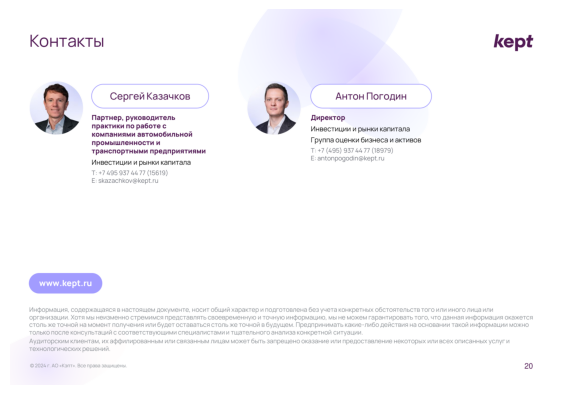

## Kept_Подвижной состав РФ_2024 (20 стр)

|   page_nums |   page_scores |
|------------:|--------------:|
|          20 |        0.5683 |
|          11 |        0.6929 |
|           2 |        0.7276 |

**Mean Score:** 0.6629
### Page: 20
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.5683

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5683      |
| text_content             | 0.6131      |
| visual_content           | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5683
> Тема: Контактная информация
>
> Цель: Предоставить контактные данные ключевых сотрудников компании
>
> Ключевая информация: Имена, должности и контактные данные Сергея Казачкова и Антона Погодина.

`text_content` d=0.6131
> Заголовок: "Контакты"
>
> 
>
> Контактные данные:
>
> 
>
> Сергей Казачков
>
> - Партнер, руководитель практики по работе

In [ ]:
results = storage.search_query_presentations(
    "Про что рассказывал Сергей Казачков?",
    n_results=30
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text, path, page = format_presentation_results(r)
print(text)

# <a id='toc2_'></a>[Запрос на общую тему](#toc0_)

## <a id='toc2_1_'></a>[Без корректировки нужный результат на втором месте](#toc0_)

Slide from: 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3.pdf
Page: 29
--------------------------------------------------------------------------------


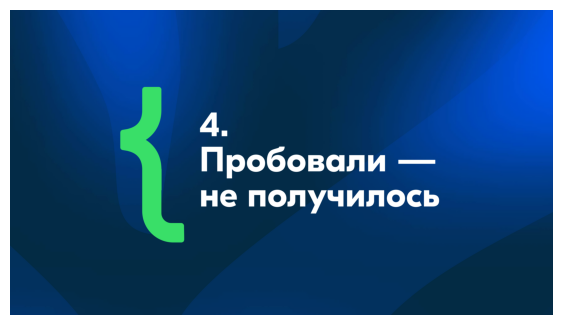

## 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3

|   page_nums |   page_scores |
|------------:|--------------:|
|          29 |        0.5761 |
|          38 |        0.7067 |

**Rank Score:** 0.5761
### Page: 29
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0.5761      |
| text_content             | not matched |
| visual_content           | not matched |
| topic_overview           | not matched |
| layout_and_composition   | not matched |
#### Content:
`conclusions_and_insights` d=0.5761
> Основное сообщение: Неудачи являются частью процесса и могут привести к важным урокам.


---




In [5]:
results = storage.search_query_presentations(
    "Благополучие",
    n_results=30,
    scorer=MinScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
print(format_presentation_results(r, n_pages=1))

Slide from: AXES_х_Понимаю_Исследование_практик_благополучия_2024.pdf
Page: 1
--------------------------------------------------------------------------------


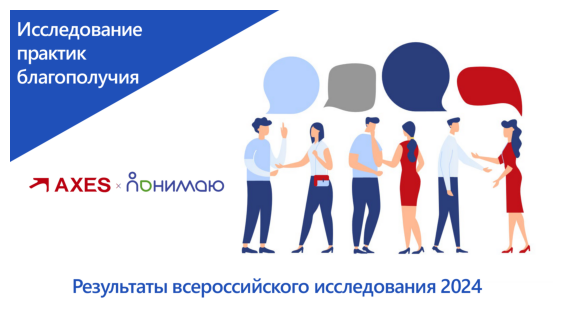

## AXES_х_Понимаю_Исследование_практик_благополучия_2024

|   page_nums |   page_scores |
|------------:|--------------:|
|           1 |        0.581  |
|           4 |        0.623  |
|          14 |        0.6267 |
|           9 |        0.634  |
|          20 |        0.6658 |
|          21 |        0.6732 |
|          17 |        0.6805 |
|           6 |        0.6816 |

**Rank Score:** 0.5810
### Page: 1
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0.5810      |
| text_content             | 0.6330      |
| topic_overview           | 0.6478      |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`conclusions_and_insights` d=0.5810
> Слайд подчеркивает важность благополучия в обществе и представляет результаты, которые могут быть полезны для дальнейшего анализа и применения в различных сфе

In [ ]:
r = results[1]
display_search_result_page(r.best_slide, display_text=False)
print(format_presentation_results(r, n_pages=1))

## <a id='toc2_2_'></a>[С корректировкой](#toc0_)

Slide from: AXES_х_Понимаю_Исследование_практик_благополучия_2024.pdf
Page: 1
--------------------------------------------------------------------------------


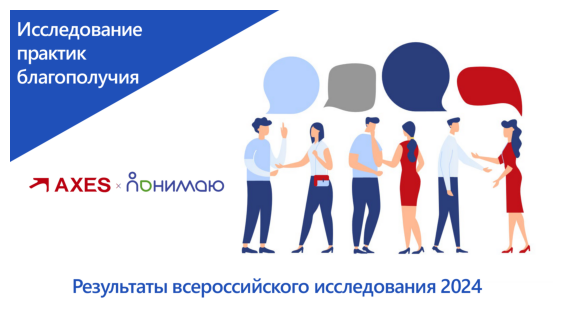

## AXES_х_Понимаю_Исследование_практик_благополучия_2024

|   page_nums |   page_scores |
|------------:|--------------:|
|           1 |        0.581  |
|           4 |        0.623  |
|          14 |        0.6267 |
|           9 |        0.634  |
|          20 |        0.6658 |
|          21 |        0.6732 |
|          17 |        0.6805 |
|           6 |        0.6816 |

**Rank Score:** 0.4380
### Page: 1
**Best matching chunk:** `conclusions_and_insights`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| conclusions_and_insights | 0.5810      |
| text_content             | 0.6330      |
| topic_overview           | 0.6478      |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`conclusions_and_insights` d=0.5810
> Слайд подчеркивает важность благополучия в обществе и представляет результаты, которые могут быть полезны для дальнейшего анализа и применения в различных сфе

In [8]:
results = storage.search_query_presentations(
    "Благополучие",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r)
print(text)

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


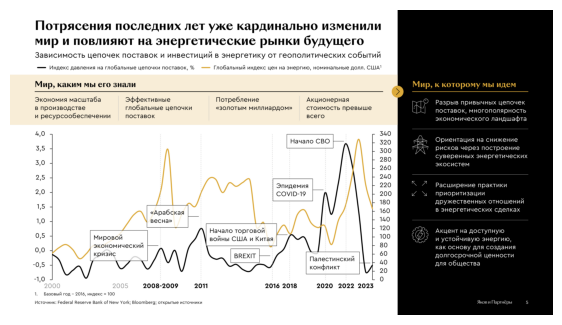

## ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России

|   page_nums |   page_scores |
|------------:|--------------:|
|           5 |        0.5265 |
|          15 |        0.5685 |
|           9 |        0.6068 |
|          21 |        0.6126 |
|           6 |        0.6434 |
|          18 |        0.6457 |
|           7 |        0.6563 |
|          17 |        0.6579 |
|          19 |        0.6583 |

**Rank Score:** 0.4146
### Page: 5
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5265      |
| visual_content           | 0.5734      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5265
> Тема: Влияние геополитических событий на энергетические рынки
>
> Цель: Показать взаимосвязь между глобальными событиями, цепочками поставок 

In [40]:
results = storage.search_query_presentations(
    "График с геополитическими событиями",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


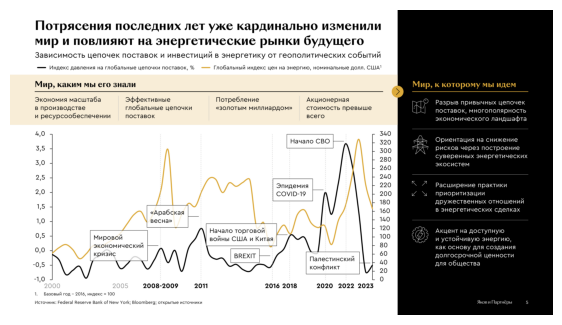

## ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России

|   page_nums |   page_scores |
|------------:|--------------:|
|           5 |        0.5265 |
|          15 |        0.5685 |
|           9 |        0.6068 |
|          21 |        0.6126 |
|           6 |        0.6434 |
|          18 |        0.6457 |
|           7 |        0.6563 |
|          17 |        0.6579 |
|          19 |        0.6583 |

**Rank Score:** 0.5265
### Page: 5
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5265      |
| visual_content           | 0.5734      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5265
> Тема: Влияние геополитических событий на энергетические рынки
>
> Цель: Показать взаимосвязь между глобальными событиями, цепочками поставок 

In [ ]:
results = storage.search_query_presentations(
    "График с геополитическими событиями",
    n_results=30,
    scorer=MinScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc3_'></a>[Фейл с "презентация про маркетплейсы"](#toc0_)

Slide from: AXES_х_Понимаю_Исследование_практик_благополучия_2024.pdf
Page: 3
--------------------------------------------------------------------------------


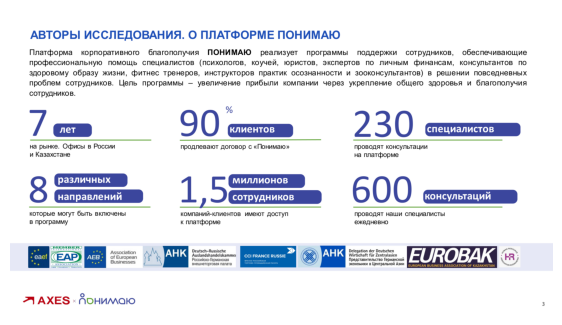

## AXES_х_Понимаю_Исследование_практик_благополучия_2024

|   page_nums |   page_scores |
|------------:|--------------:|
|           3 |        0.4636 |

**Rank Score:** 0.4636
### Page: 3
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4636      |
| text_content             | not matched |
| visual_content           | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4636
> Тема: Платформа корпоративного благополучия "Понимаю"
>
> Цель: Представить информацию о платформе и ее ключевых показателях
>
> Ключевая информация: Данные о времени на рынке, количестве клиентов и специалистов.


---




In [ ]:
results = storage.search_query_presentations(
    "Презентация про маркетплейсы",
    n_results=30,
    scorer=MinScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc4_'></a>[Фейл с мемом "И так сойдет"](#toc0_)

Slide from: 2. Пристягина Матрицы компетенций.pdf
Page: 8
--------------------------------------------------------------------------------


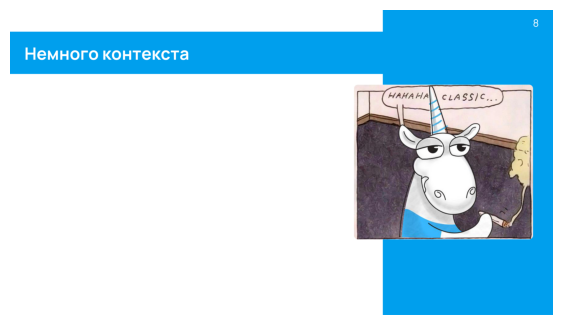

## 2. Пристягина Матрицы компетенций

|   page_nums |   page_scores |
|------------:|--------------:|
|           8 |        0.5543 |
|          30 |        0.5704 |
|          42 |        0.6186 |
|           6 |        0.6248 |
|           4 |        0.6282 |
|           3 |        0.6343 |
|           7 |        0.641  |
|          52 |        0.6446 |

**Rank Score:** 0.4175
### Page: 8
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5543      |
| text_content             | not matched |
| visual_content           | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5543
> Тема: Контекст для дальнейшего обсуждения.
>
> Цель: Подготовить аудиторию к следующей части презентации с помощью юмора.
>
> Ключевая информация: Использование комикса для создания легкой атмосфер

In [37]:
results = storage.search_query_presentations(
    "Презентация в которой был мем с Вовочкой (и так сойдет)",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc5_'></a>[Презентация про рексис. ОК](#toc0_)

Slide from: 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3.pdf
Page: 4
--------------------------------------------------------------------------------


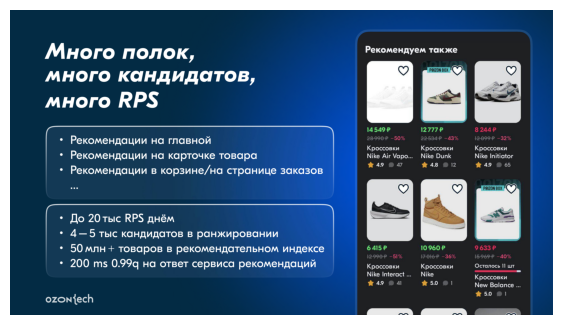

## 4.Эволюция отбора кандидатов в системе товарных рекомендаций Ozon_Александр Краснов_вер.3

|   page_nums |   page_scores |
|------------:|--------------:|
|           4 |        0.3484 |
|          22 |        0.4269 |
|          26 |        0.4926 |
|           1 |        0.5016 |
|          32 |        0.5033 |
|          37 |        0.5426 |
|          21 |        0.5503 |
|           9 |        0.5583 |
|          38 |        0.562  |

**Rank Score:** 0.3235
### Page: 4
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.3484      |
| text_content             | not matched |
| visual_content           | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.3484
> Тема: Рекомендательные системы в электронной коммерции
>
> Цель: Показать возможности и объемы работы системы 

In [ ]:
results = storage.search_query_presentations(
    "Презентация про рекомендательные системы",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc6_'></a>[Презентация про CV.](#toc0_)
## <a id='toc6_1_'></a>[Без HyperbolicScorer нашел не то](#toc0_)

Slide from: 4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3.pdf
Page: 49
--------------------------------------------------------------------------------


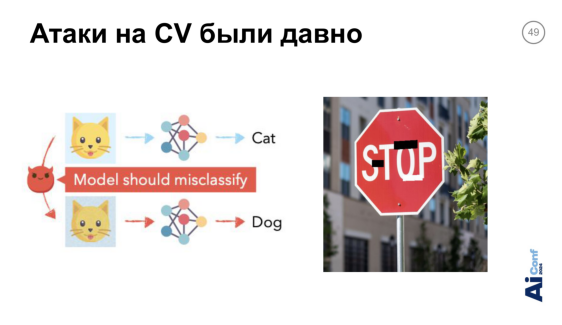

## 4.Обзор уязвимостей и техник защиты для LLM_Евгений Кокуйкин_вер.3

|   page_nums |   page_scores |
|------------:|--------------:|
|          49 |        0.4854 |
|          34 |        0.5573 |
|           8 |        0.5713 |

**Rank Score:** 0.4854
### Page: 49
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4854      |
| conclusions_and_insights | 0.5253      |
| text_content             | not matched |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4854
> Тема: Атаки на компьютерное зрение (CV)
>
> Цель: Показать примеры атак на модели классификации изображений
>
> Ключевая информация: Ошибочная классификация объектов и ее последствия.

`conclusions_and_insights` d=0.5253
> Основные выводы:
>
> - Атаки на модели компьютерного зрения могут привести к серьезным ошибкам в клас

In [ ]:
results = storage.search_query_presentations(
    "Презентация про компьютерное зрение в которой разбирали пример с подсчетом людей на площади",
    n_results=30,
    scorer=MinScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

## <a id='toc6_2_'></a>[С HyperbolicScorer нашел что надо](#toc0_)

Slide from: 6.Увеличиваем число обнаружений в задачах_Дмитрий Колесников_вер.4.pdf
Page: 1
--------------------------------------------------------------------------------


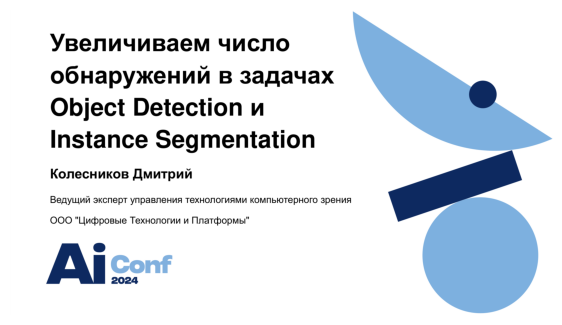

## 6.Увеличиваем число обнаружений в задачах_Дмитрий Колесников_вер.4

|   page_nums |   page_scores |
|------------:|--------------:|
|           1 |        0.5007 |
|          30 |        0.512  |
|          12 |        0.5212 |
|          21 |        0.5261 |
|          18 |        0.5315 |
|           5 |        0.544  |
|          26 |        0.5488 |
|           8 |        0.5536 |
|          27 |        0.5585 |
|          10 |        0.5623 |
|          11 |        0.5689 |
|          20 |        0.572  |
|          16 |        0.5754 |
|          24 |        0.578  |

**Rank Score:** 0.3647
### Page: 1
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5007      |
| conclusions_and_insights | 0.5580      |
| text_content             | not matched |
| visual_content           | not matched |
| layout_and_composition   | not matched |
#### Content:
`

In [45]:
results = storage.search_query_presentations(
    "Презентация про компьютерное зрение в которой разбирали пример с подсчетом людей на площади",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc7_'></a>[Презентация про окатыши. Ок](#toc0_)

Slide from: 3.Система управления процессом окомкования железорудных окатышей_Андрей Голов_вер.2.pdf
Page: 13
--------------------------------------------------------------------------------


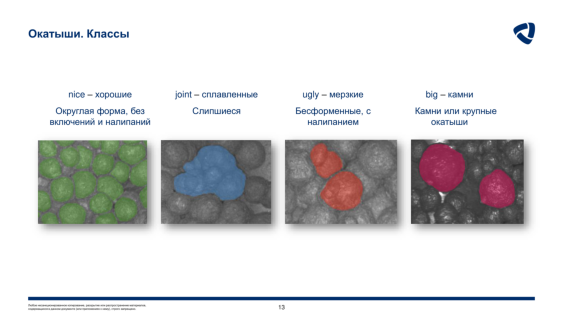

## 3.Система управления процессом окомкования железорудных окатышей_Андрей Голов_вер.2

|   page_nums |   page_scores |
|------------:|--------------:|
|          13 |        0.4399 |
|           1 |        0.5199 |
|           6 |        0.5233 |
|           5 |        0.5355 |
|           2 |        0.545  |
|           3 |        0.5637 |
|          19 |        0.5691 |
|           4 |        0.603  |
|          14 |        0.6063 |
|           7 |        0.6249 |

**Rank Score:** 0.3639
### Page: 13
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.4399      |
| text_content             | 0.4839      |
| visual_content           | 0.5343      |
| conclusions_and_insights | 0.5767      |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.4399
> Тема: Классификация окатышей
>
> Цель: Показать различные классы окатышей и их хара

In [46]:
results = storage.search_query_presentations(
    "Презентация про окатыши",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc8_'></a>[Презентация с таблицей. Нашел, но не тот слайд.](#toc0_)

Slide from: SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр.pdf
Page: 53
--------------------------------------------------------------------------------


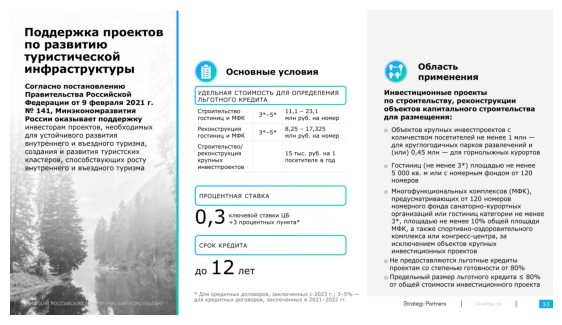

## SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр

|   page_nums |   page_scores |
|------------:|--------------:|
|          53 |        0.3728 |
|           9 |        0.46   |
|          46 |        0.4639 |
|          38 |        0.4704 |
|          39 |        0.4704 |
|          37 |        0.4708 |
|          10 |        0.4816 |
|           5 |        0.4824 |
|          28 |        0.4926 |
|          12 |        0.4926 |
|          22 |        0.5138 |
|          55 |        0.5222 |
|          11 |        0.5229 |
|          47 |        0.5312 |
|          52 |        0.5331 |
|          33 |        0.5361 |

**Rank Score:** 0.3728
### Page: 53
**Best matching chunk:** `visual_content`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| visual_content           | 0.3728      |
| text_content             | not matched |
| topic_overview           | not matched |
| conclusions_and_insights | not matched |
| layout_and

In [ ]:
results = storage.search_query_presentations(
    "Слайд с большой таблицей программ кредитования. Там были специальные условия",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

Slide from: 1.За рамками сценария_Эмели Драль_вер.3.pdf
Page: 38
--------------------------------------------------------------------------------


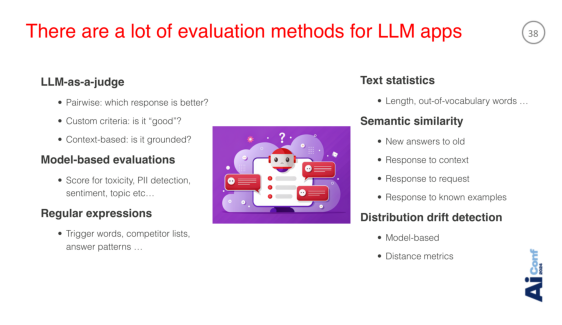

## 1.За рамками сценария_Эмели Драль_вер.3

|   page_nums |   page_scores |
|------------:|--------------:|
|          38 |        0.2741 |
|           4 |        0.294  |
|          30 |        0.3183 |
|           2 |        0.3207 |
|          41 |        0.3231 |
|           6 |        0.3319 |
|          27 |        0.339  |
|           5 |        0.3631 |
|          22 |        0.4489 |
|           1 |        0.457  |
|          21 |        0.4701 |

**Rank Score:** 0.2241
### Page: 38
**Best matching chunk:** `topic_overview`\
**Chunk distances:**

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.2741      |
| text_content             | 0.3490      |
| visual_content           | 0.4601      |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.2741
> Тема: Методы оценки приложений LLM
>
> Цель: Обозначить различные подходы к оценке ответов, ген

In [ ]:
results = storage.search_query_presentations(
    "В какой презентации обсуждали методы оценки LLM",
    n_results=30,
    scorer=HyperbolicScorer()
)
r = results[0]
display_search_result_page(r.best_slide, display_text=False)
text = format_presentation_results(r, n_pages=1)
print(text)

# <a id='toc9_'></a>[Код для скоринга](#toc0_)

In [9]:
import numpy as np

scores = np.array([0.3, 0.5, 0.4, 0.2])
scores = np.array([0.3, 0.5, 0.4, 0.8])
n = len(scores)
weights = np.arange(n)[::-1] + 1
weigthed_score = (scores * weights).sum() / weights.sum()

# Adjust weighted score
k = 3
p = 4
rank_score = -k * n / (1 - p * n) * weigthed_score

weigthed_score, rank_score

(0.43, 0.34400000000000003)

Slide from: ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России.pdf
Page: 5
--------------------------------------------------------------------------------


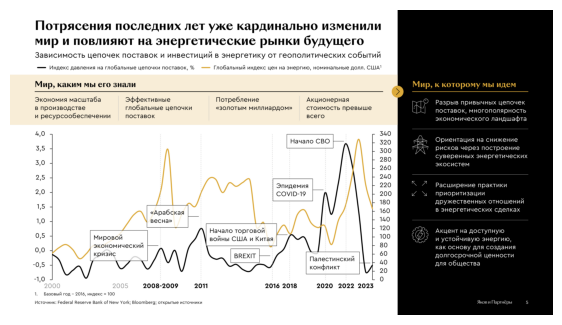

## ЯиП_Энергетический_переход_Вызовы_и_возможности_для_России

|   page_nums |   page_scores |
|------------:|--------------:|
|           5 |        0.5265 |
|          15 |        0.5685 |
|           9 |        0.6067 |
|          21 |        0.6126 |
|           6 |        0.6434 |
|          18 |        0.6457 |
|           7 |        0.6563 |
|          17 |        0.6579 |
|          19 |        0.6584 |

**Rank Score:** 0.4146
### Page: 5
**Best matching chunk:** `topic_overview`\
**Chunk distances:** 0.5265

| chunk type               | distance    |
|:-------------------------|:------------|
| topic_overview           | 0.5265      |
| visual_content           | 0.5733      |
| text_content             | not matched |
| conclusions_and_insights | not matched |
| layout_and_composition   | not matched |
#### Content:
`topic_overview` d=0.5265
> Тема: Влияние геополитических событий на энергетические рынки
>
> Цель: Показать взаимосвязь между глобальными событиями, цепочками по

(0.5, 1.2)

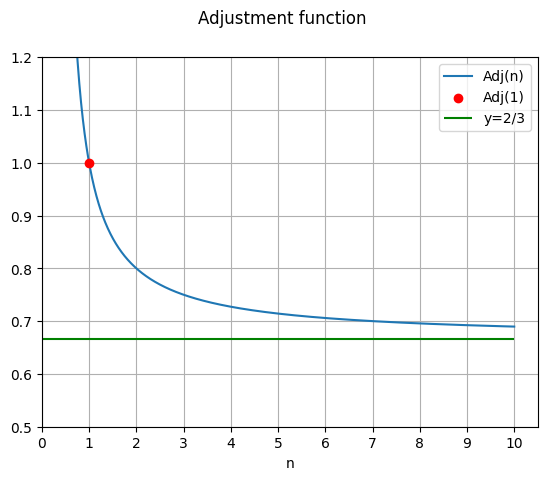

In [53]:
import matplotlib.pyplot as plt

k = 2
p = 3
asympt = k/p

xs = np.linspace(0.7, 10, 1000)
ys = -k*xs/(1-p*xs)
plt.plot(xs, ys, label="Adj(n)")

plt.scatter([1], [1], color='red', label="Adj(1)", zorder=10)

plt.hlines(asympt, 0, 10, color='green', label=f"y={k}/{p}")



plt.xticks(np.arange(0, 11, 1))
plt.grid()
plt.legend()
plt.suptitle("Adjustment function")
plt.xlabel("n")

plt.xlim(0, None)
plt.ylim(0.5, 1.2)